In [25]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from datetime import datetime
from pathlib import Path
from matplotlib.patches import Rectangle

from utils import *

BASE_DIR = Path(os.path.abspath(''))
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

save_results = False
exp_folder = '2024_03_25_WL'

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


# Compare effect of pre-training

In [26]:
colors = ['slategray', 'forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred']
drop_metrics = ['Loss', 'Accuracy']

### p = (0.75, 0.75)

In [27]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.75', exp_folder=exp_folder)

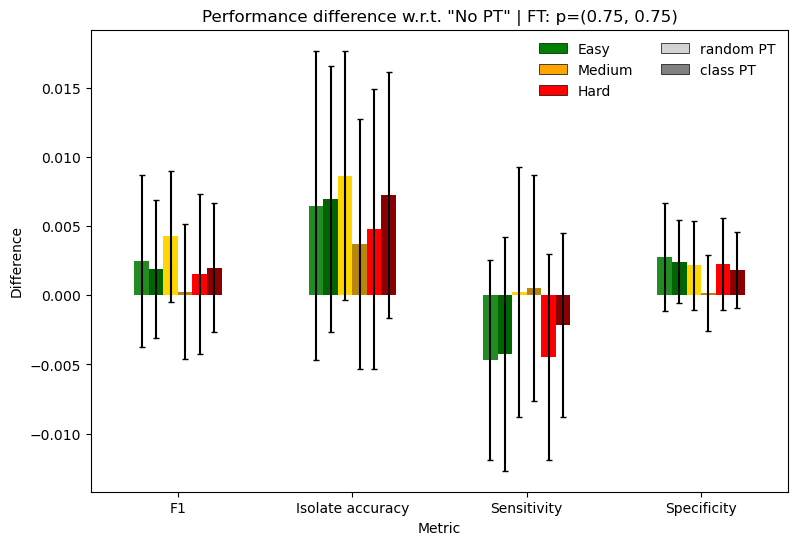

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, figsize=(9, 6), color=colors[1:], ax=ax, capsize=2, ecolor='k')
ax.set_title('Performance difference w.r.t. "No PT" | FT: p=(0.75, 0.75)')
ax.set_xlabel('Metric')
ax.set_ylabel('Difference')
easy = Rectangle((0,0),1,1,fc='green', edgecolor='k', linewidth=0.5)
medium = Rectangle((0,0),1,1,fc='orange', edgecolor='k', linewidth=0.5)
hard = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax.legend(
    handles=[easy, medium, hard, pt, cpt], 
    labels=['Easy', 'Medium', 'Hard', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,  
    # loc='lower right',
)
savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'rnd0.7FT_rel_diff.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

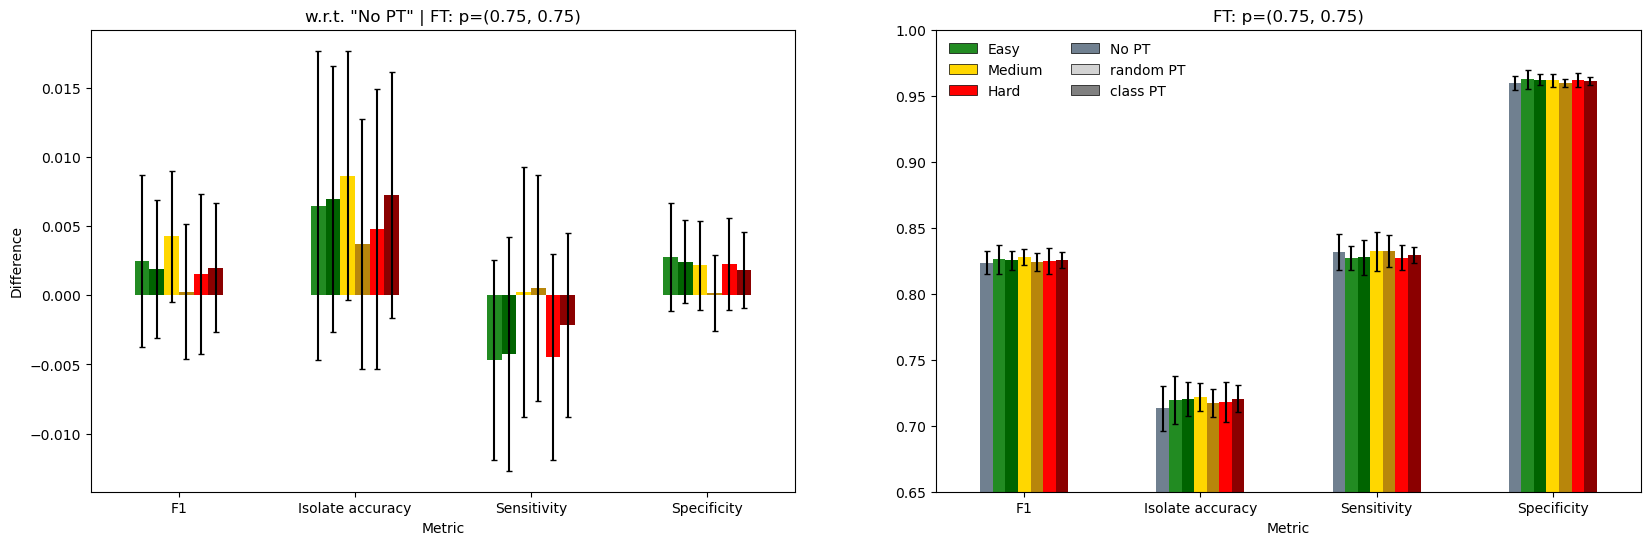

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.75)')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.75)')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'rand0.75FT_diff.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

In [30]:
df_CV['avg']

model,No PT,Easy RPT,Easy CPT,Medium RPT,Medium CPT,Hard RPT,Hard CPT
metric,,,,,,,
Accuracy,0.937245,0.938600,0.938396,0.939083,0.937370,0.938207,0.938273
F1,0.823503,0.825963,0.825413,0.827760,0.823771,0.825049,0.825507
Isolate accuracy,0.713207,0.719700,0.720164,0.721864,0.716917,0.717997,0.720473
Loss,0.217557,0.214208,0.212780,0.215537,0.214426,0.215050,0.213627
Sensitivity,0.831760,0.827100,0.827517,0.832011,0.832303,0.827322,0.829599
Specificity,0.959602,0.962373,0.962026,0.961790,0.959768,0.961864,0.961450


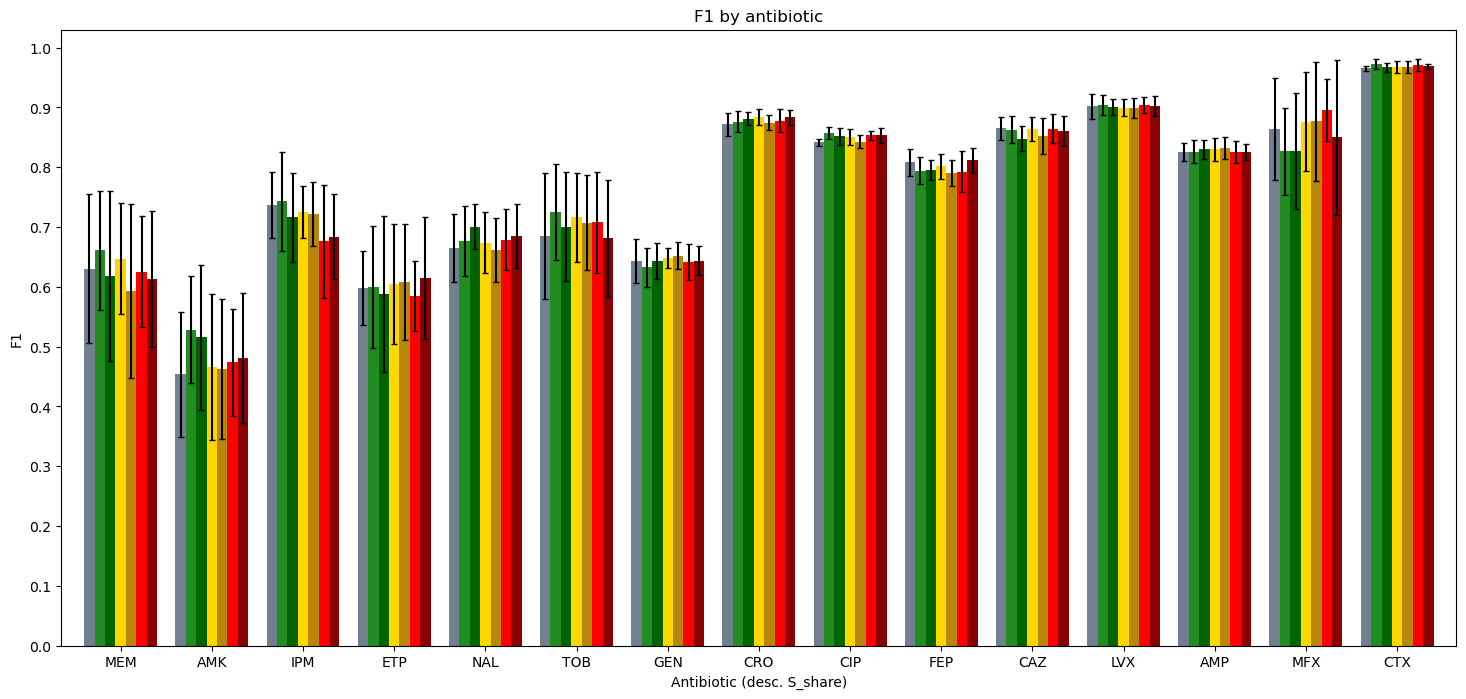

In [31]:
df_CV_ab = load_and_create_ab_df('0.75_0.75', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

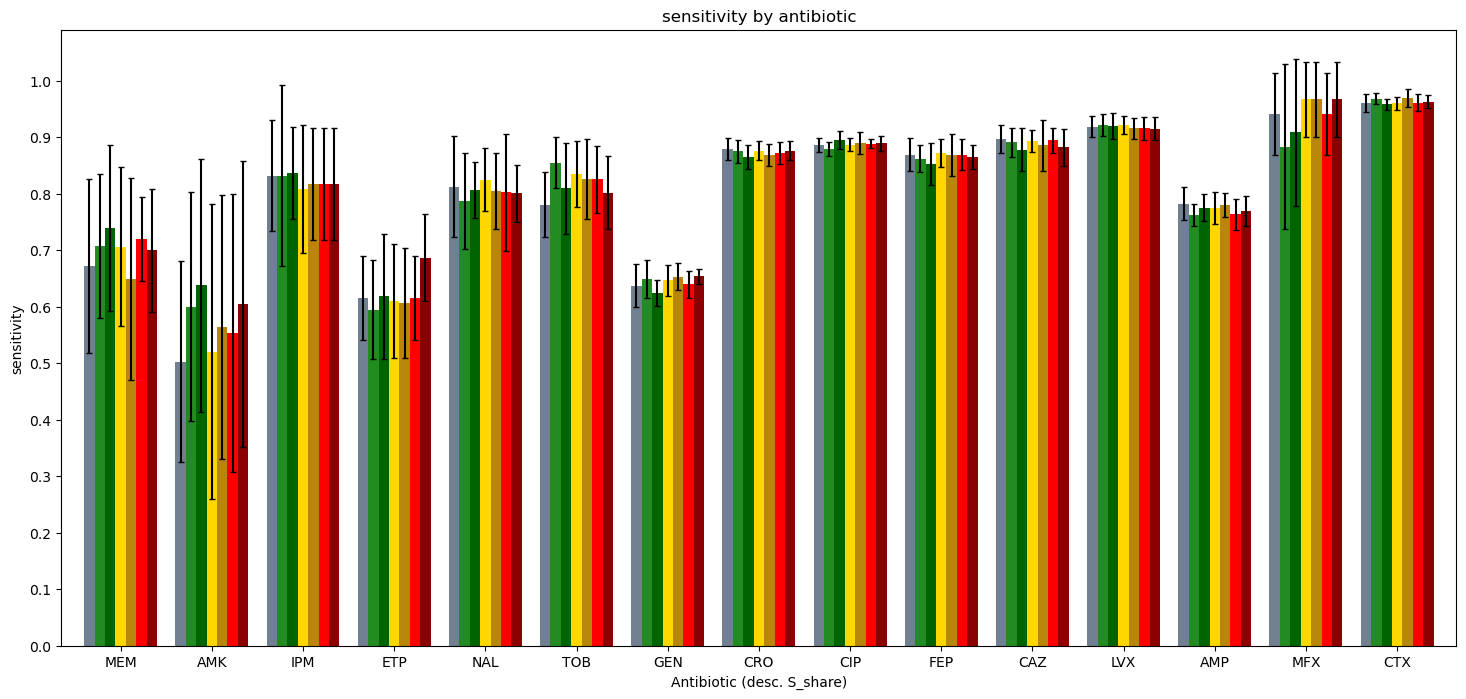

In [32]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

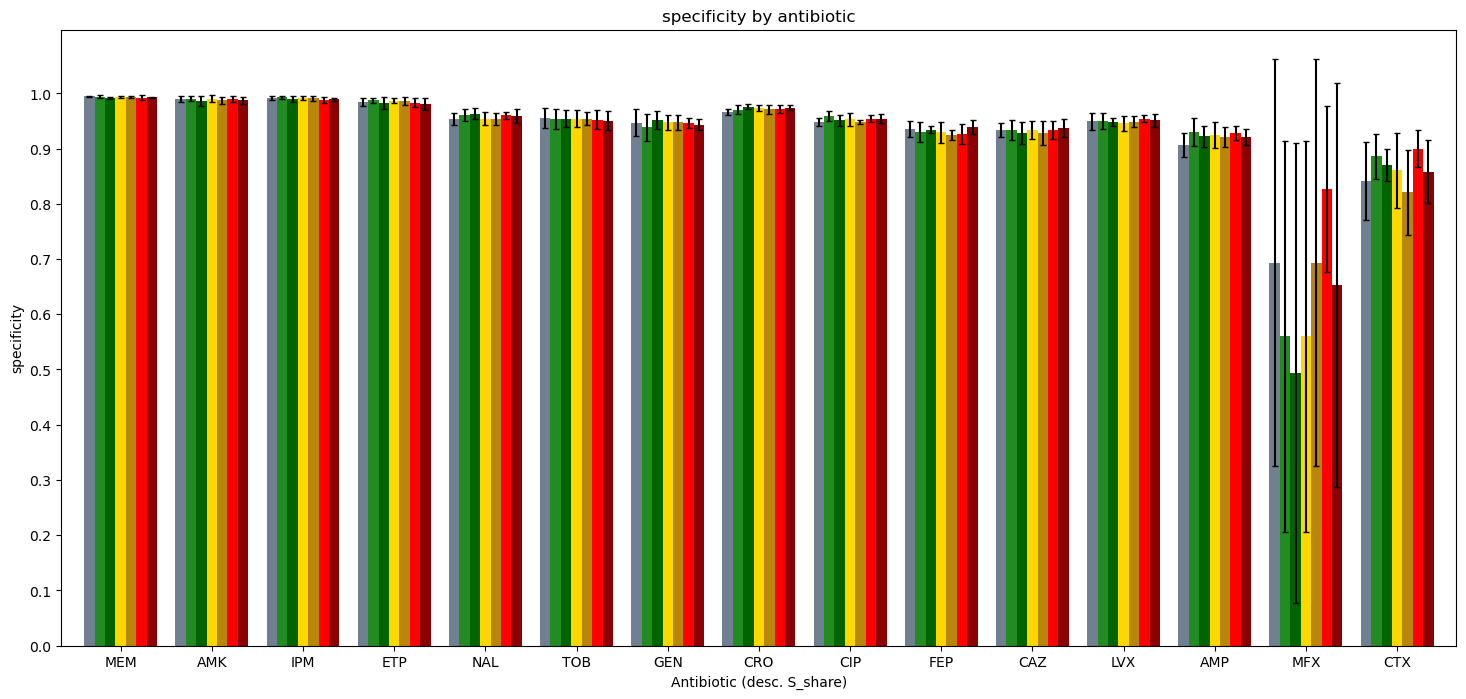

In [33]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

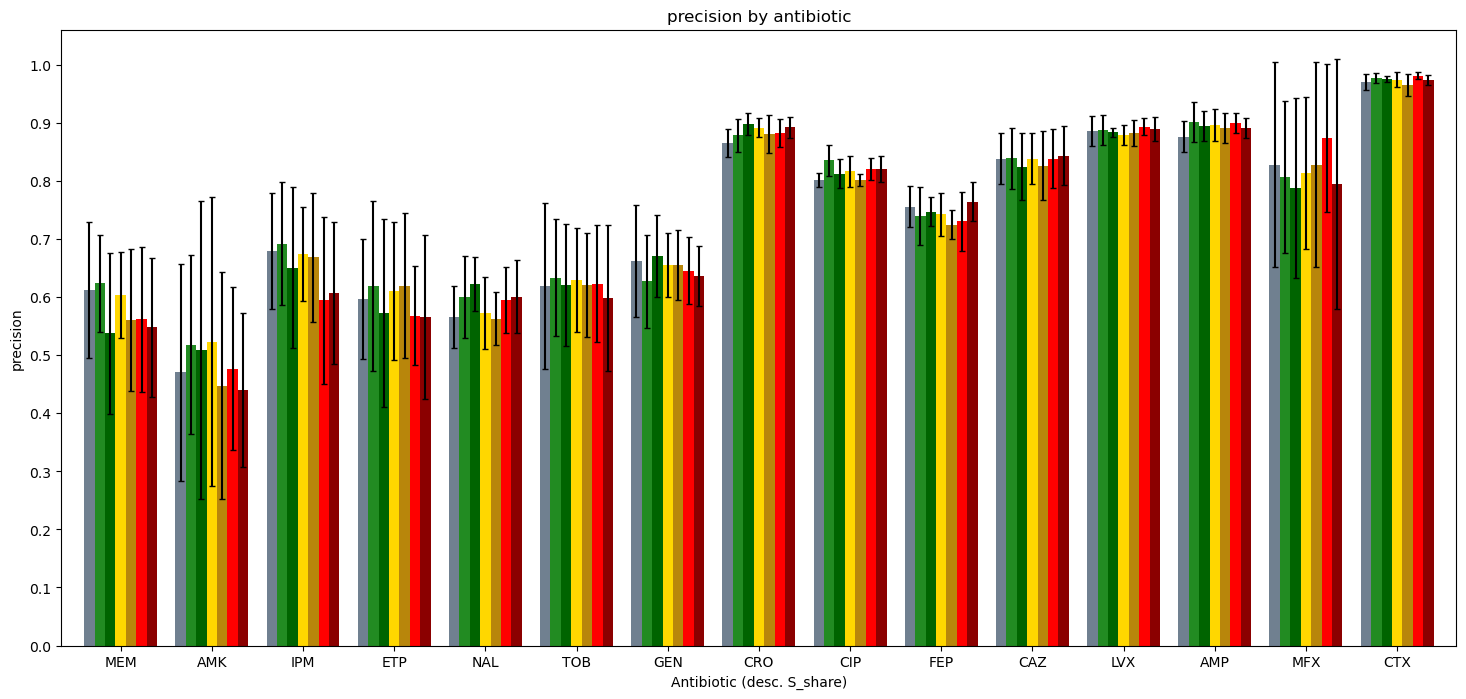

In [34]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

# Reduced training size

### p = (0.75, 0.75)

In [9]:
df_CV_noPT = load_and_create_train_share_df('No PT', '0.75_0.75', exp_folder=exp_folder)
df_CV_easyPT = load_and_create_train_share_df('Easy RPT', '0.75_0.75', exp_folder=exp_folder)
df_CV_easyCPT = load_and_create_train_share_df('Easy CPT', '0.75_0.75', exp_folder=exp_folder)
df_CV_mediumPT = load_and_create_train_share_df('Medium RPT', '0.75_0.75', exp_folder=exp_folder)
df_CV_mediumCPT = load_and_create_train_share_df('Medium CPT', '0.75_0.75', exp_folder=exp_folder)
df_CV_hardPT = load_and_create_train_share_df('Hard RPT', '0.75_0.75', exp_folder=exp_folder)
df_CV_hardCPT = load_and_create_train_share_df('Hard CPT', '0.75_0.75', exp_folder=exp_folder)
train_shares = [1, 5, 10, 20, 30]
df_CV_list = [df_CV_noPT, df_CV_easyPT, df_CV_easyCPT, df_CV_mediumPT, df_CV_mediumCPT, df_CV_hardPT, df_CV_hardCPT]

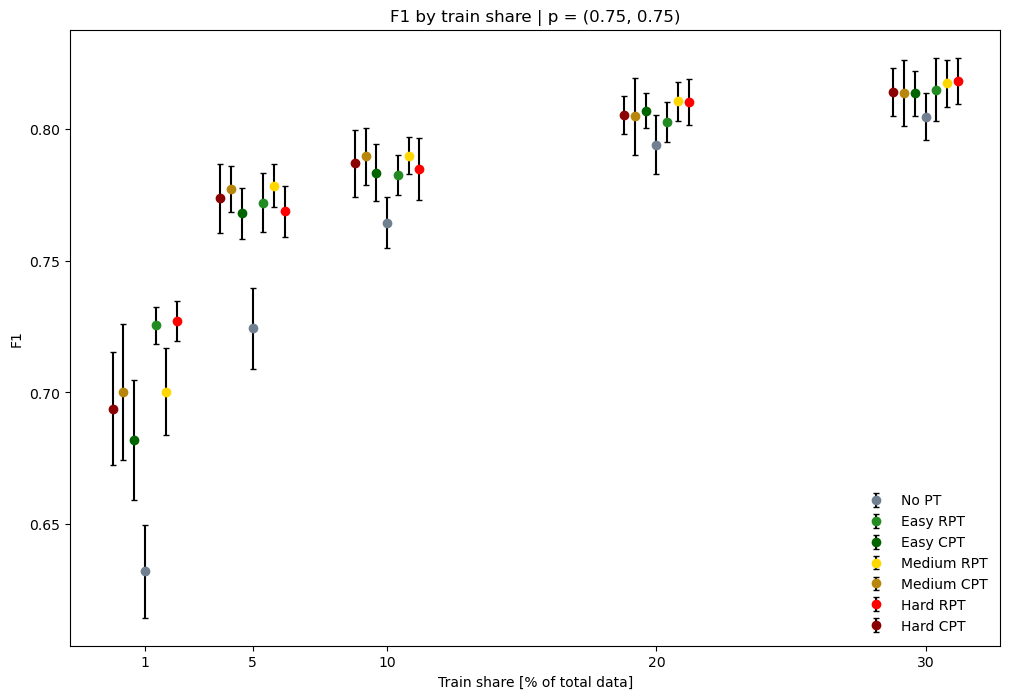

In [10]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'F1',
    plot_title='F1 by train share | p = (0.75, 0.75)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_0.75_0.75.png') if save_results else None,
) 

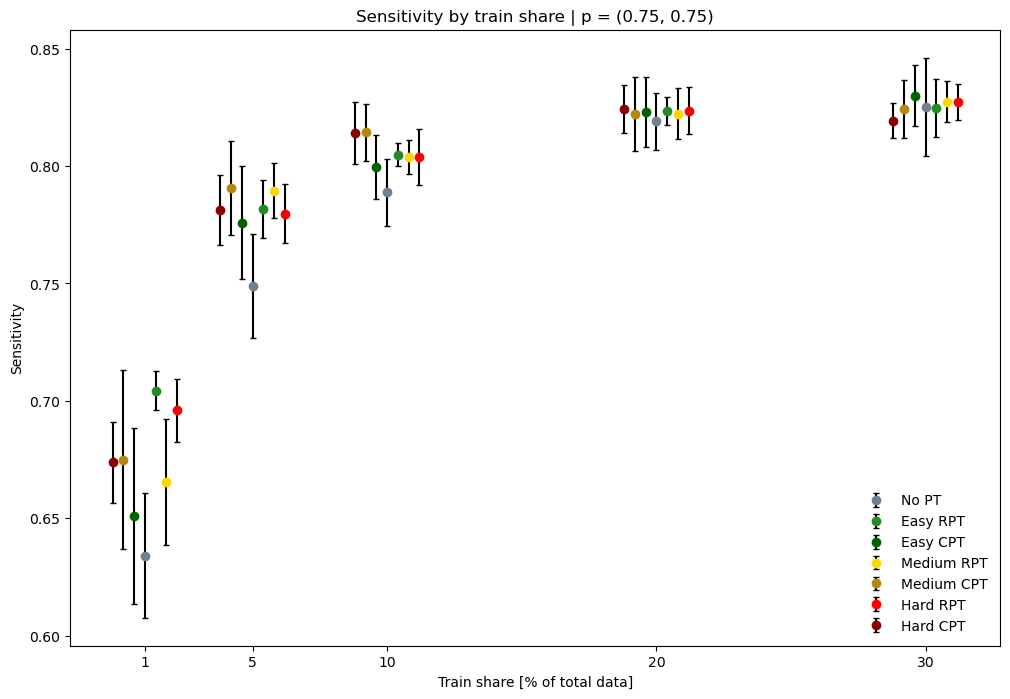

In [11]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Sensitivity',
    plot_title='Sensitivity by train share | p = (0.75, 0.75)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'sens_by_train_share_0.75_0.7.png') if save_results else None,
) 

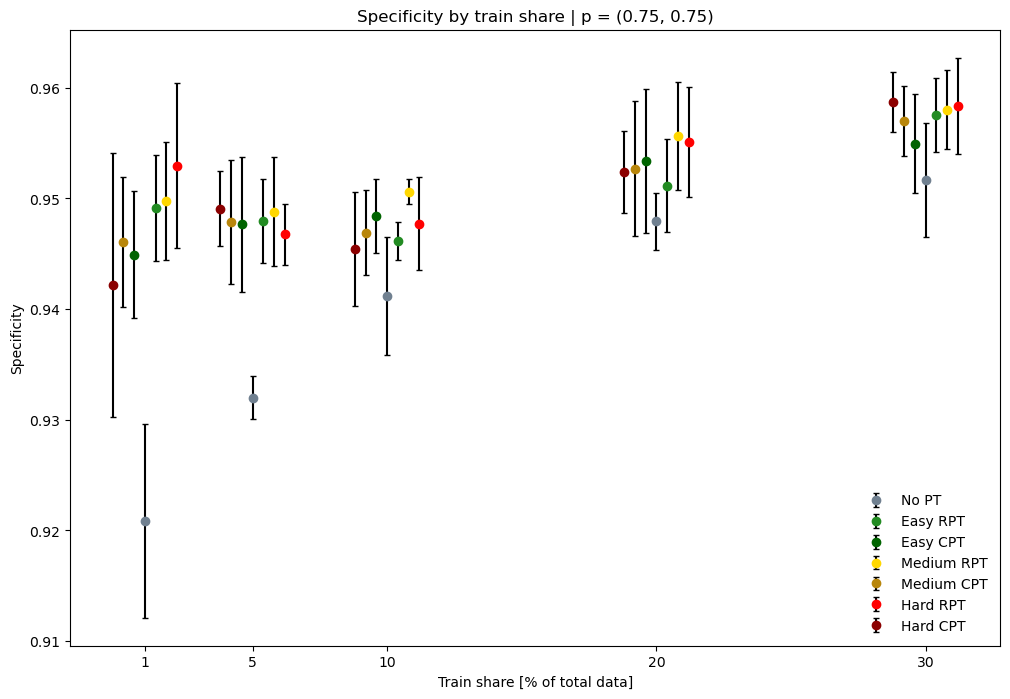

In [12]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Specificity',
    plot_title='Specificity by train share | p = (0.75, 0.75)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_p_0.75_0.7.png') if save_results else None,
) 

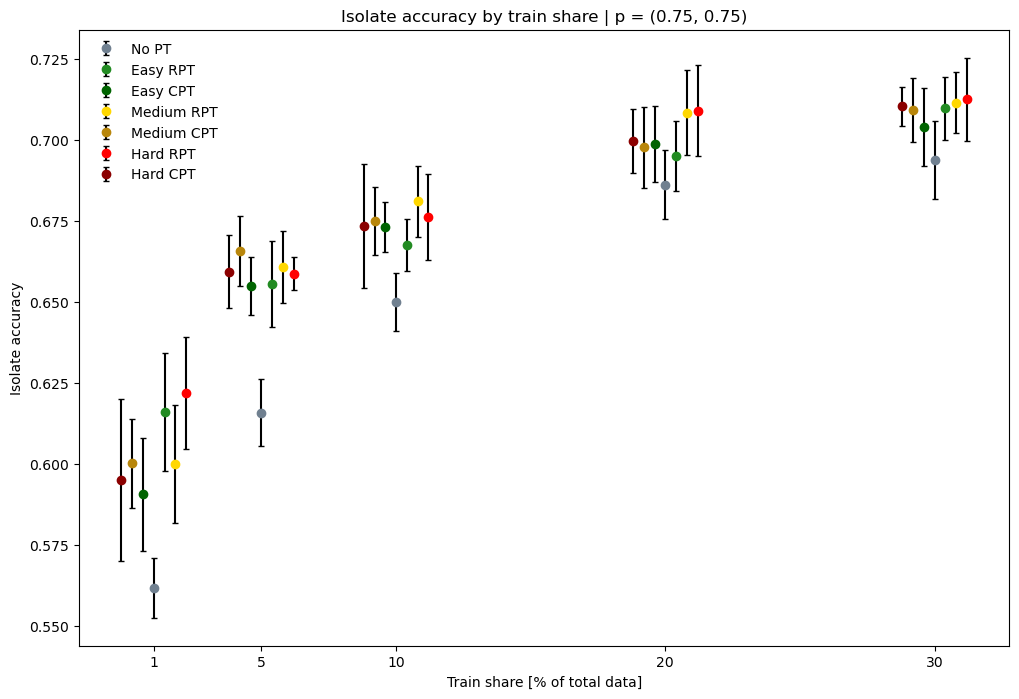

In [13]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Isolate accuracy',
    plot_title='Isolate accuracy by train share | p = (0.75, 0.75)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_p_0.75_0.7.png') if save_results else None,
) 

# In-depth plots at specific train shares

### 1%

p = (0.75, 0.75)

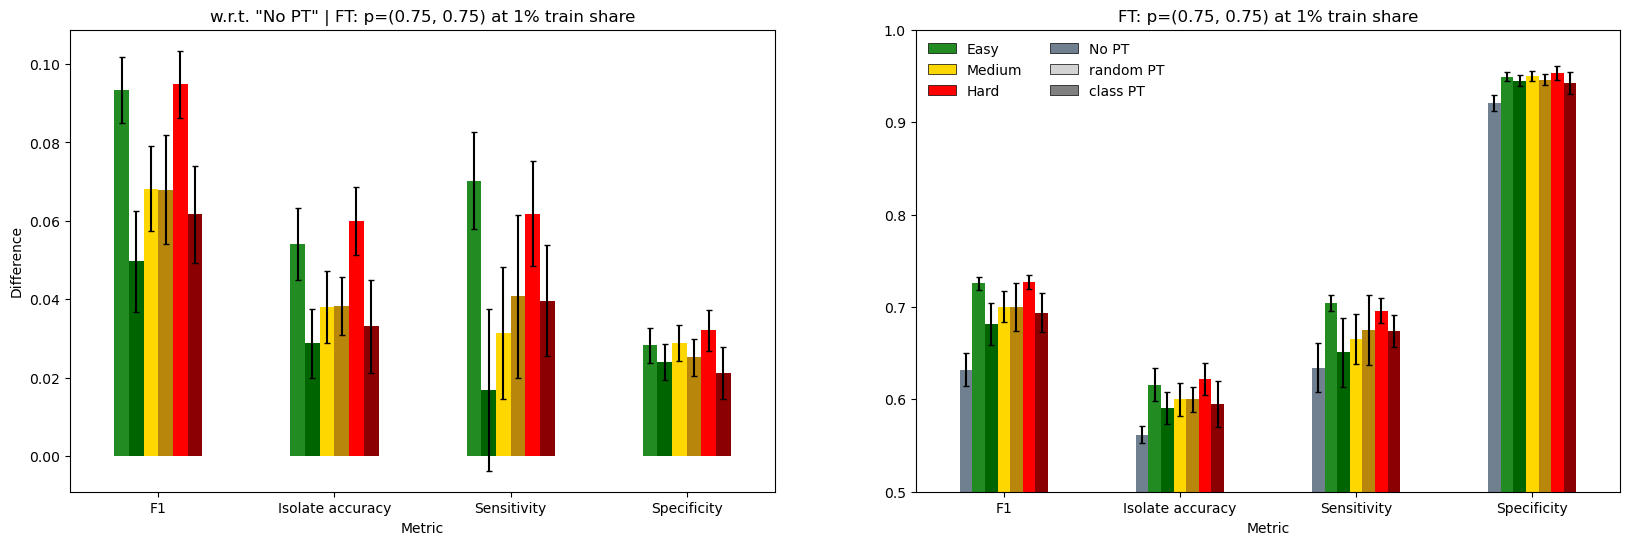

In [14]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.75', '0.01', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.75) at 1% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.75) at 1% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.01.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()


c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:133: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


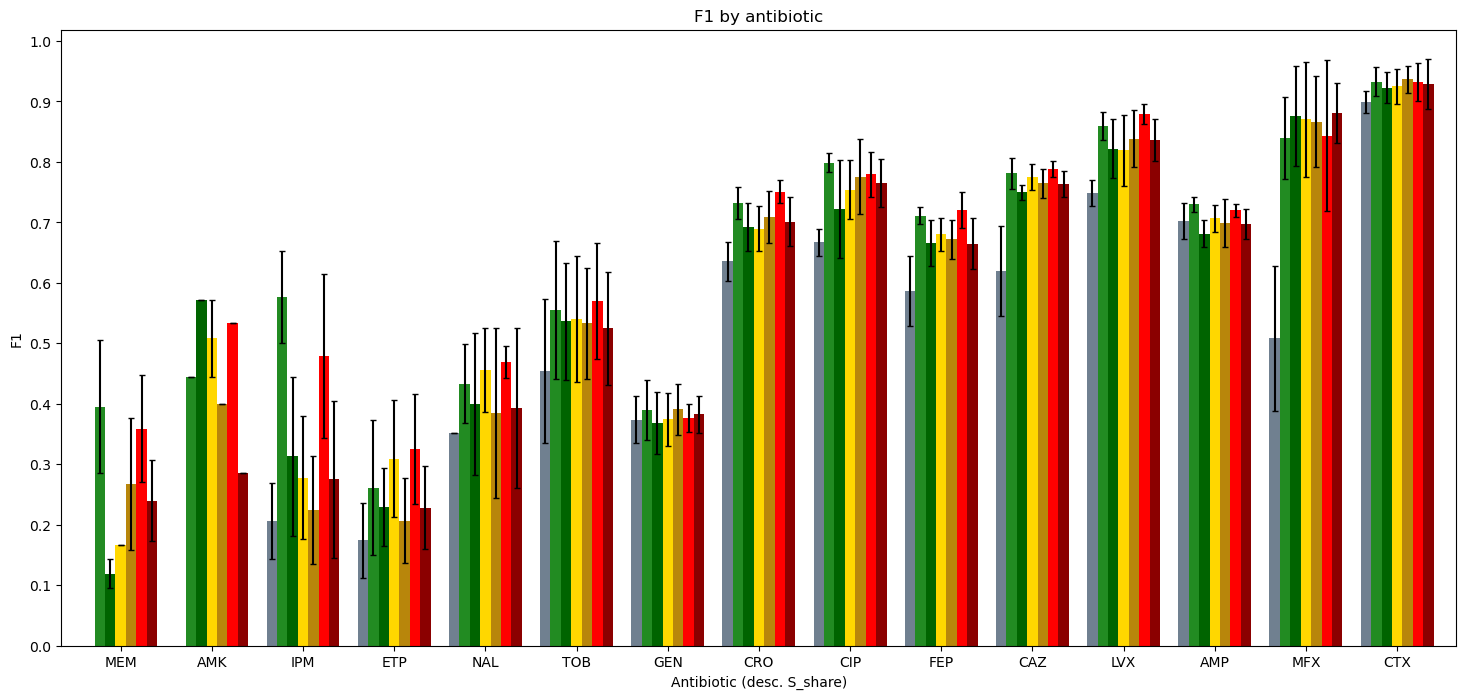

In [15]:
df_CV_ab = load_and_create_ab_df('0.75_0.75', train_share='0.01', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_F1_by_ab_0.01.png') if save_results else None,
)

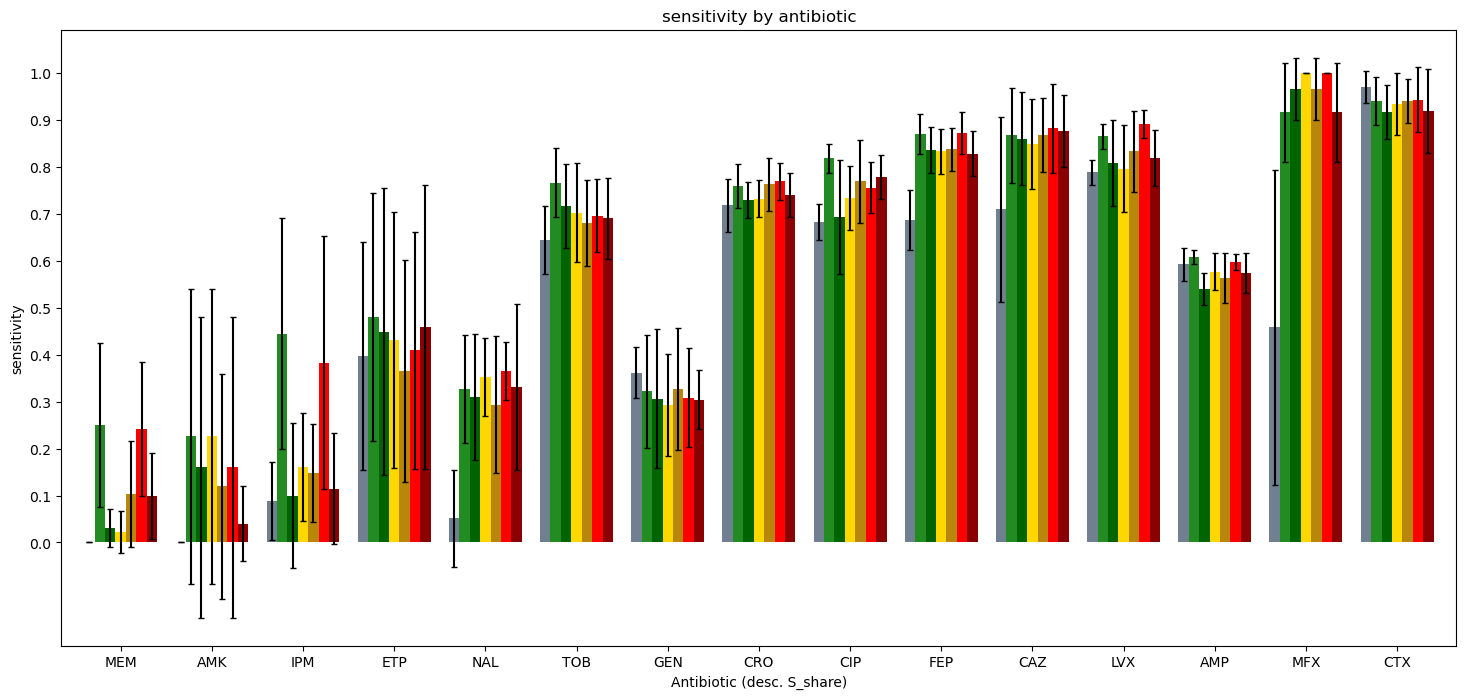

In [16]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### 5%

p = (0.75, 0.75)

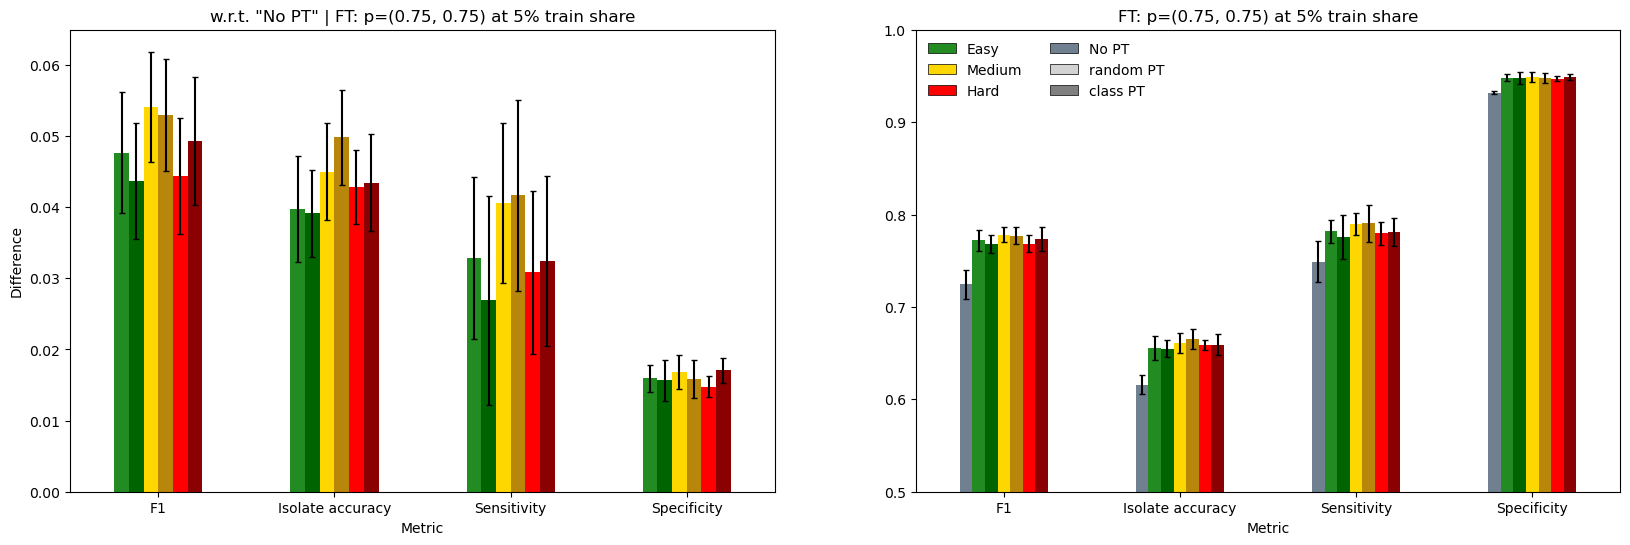

In [17]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.75', '0.05', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.75) at 5% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.75) at 5% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.05.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()


c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:133: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


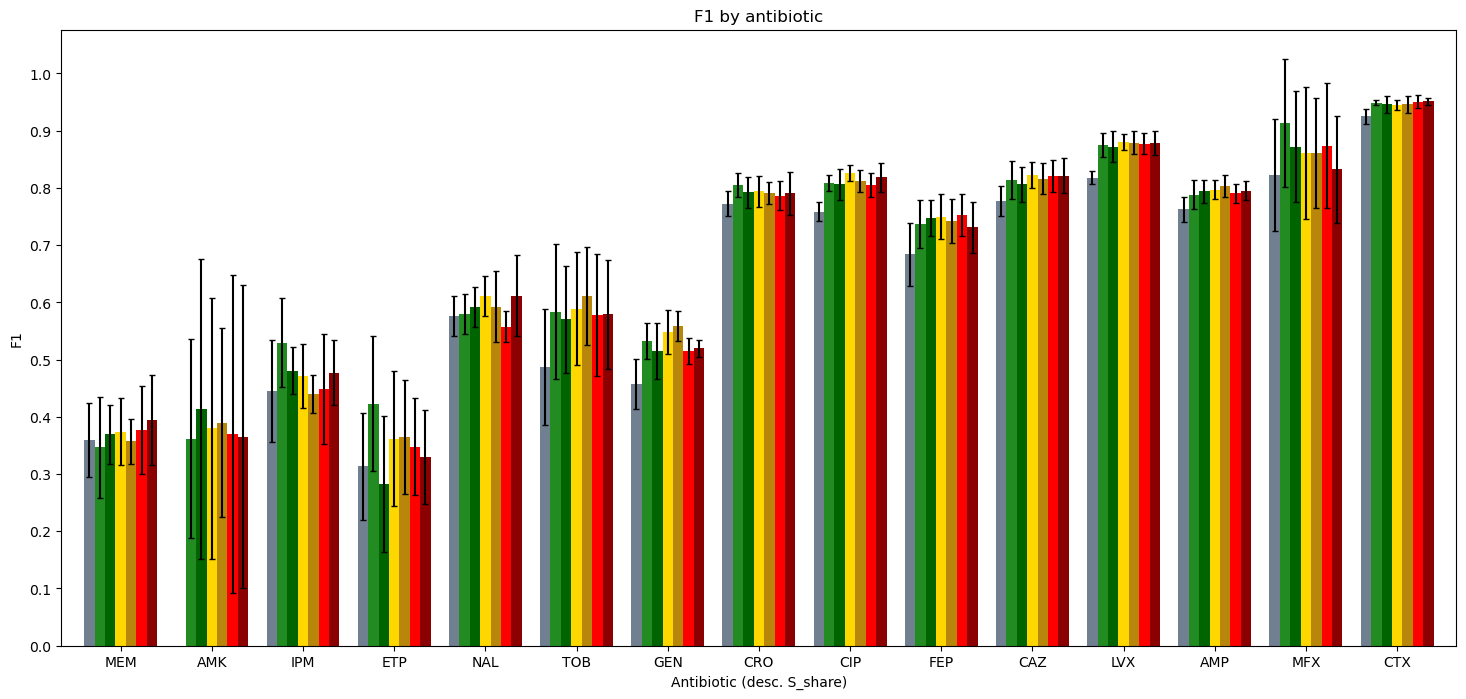

In [18]:
df_CV_ab = load_and_create_ab_df('0.75_0.75', train_share='0.05', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

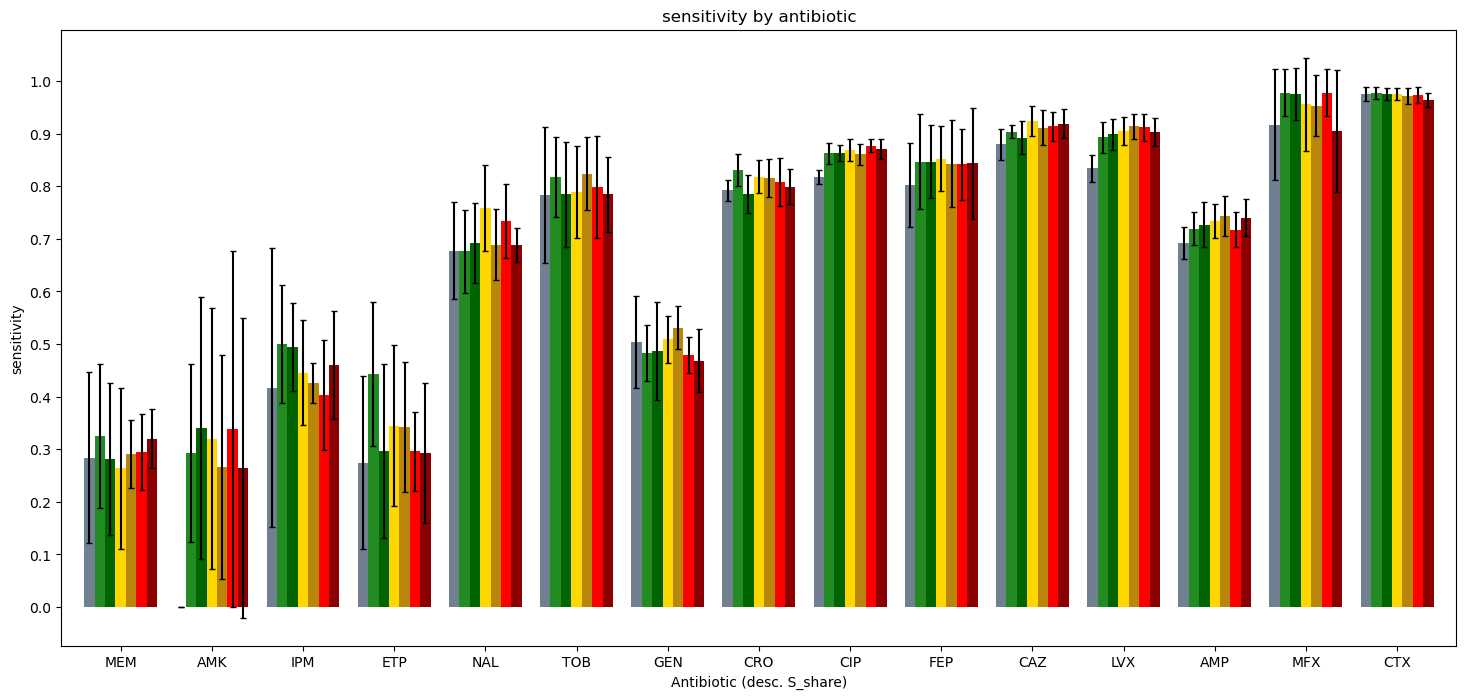

In [19]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

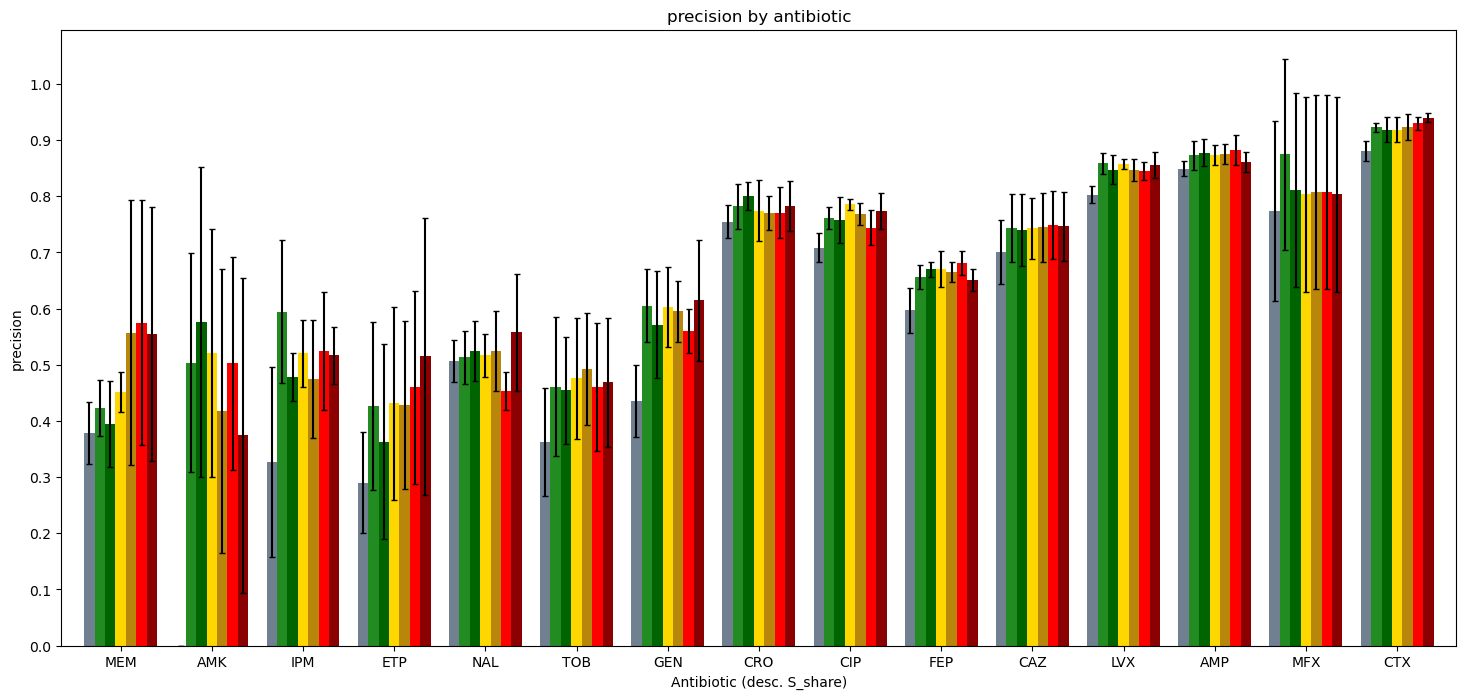

In [20]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### 10%

p = (0.75, 0.75)

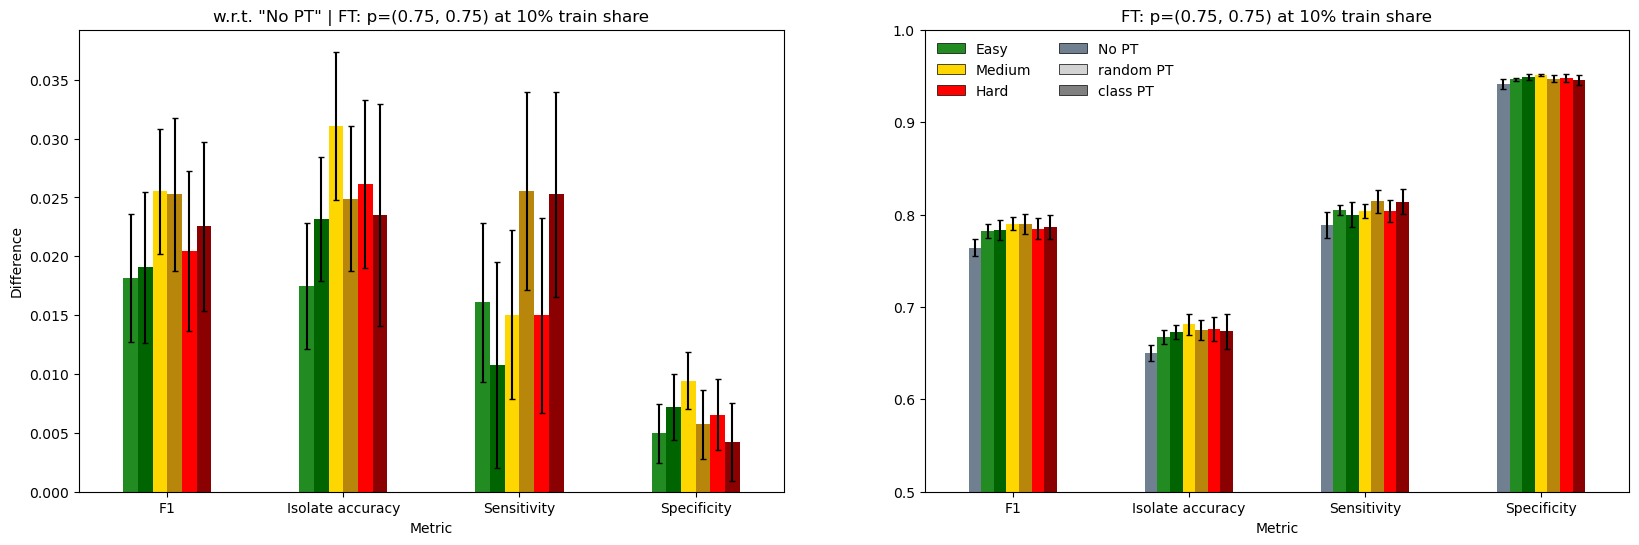

In [21]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.75', '0.1', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.75) at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.75) at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

### 30%

p = (0.75, 0.75)

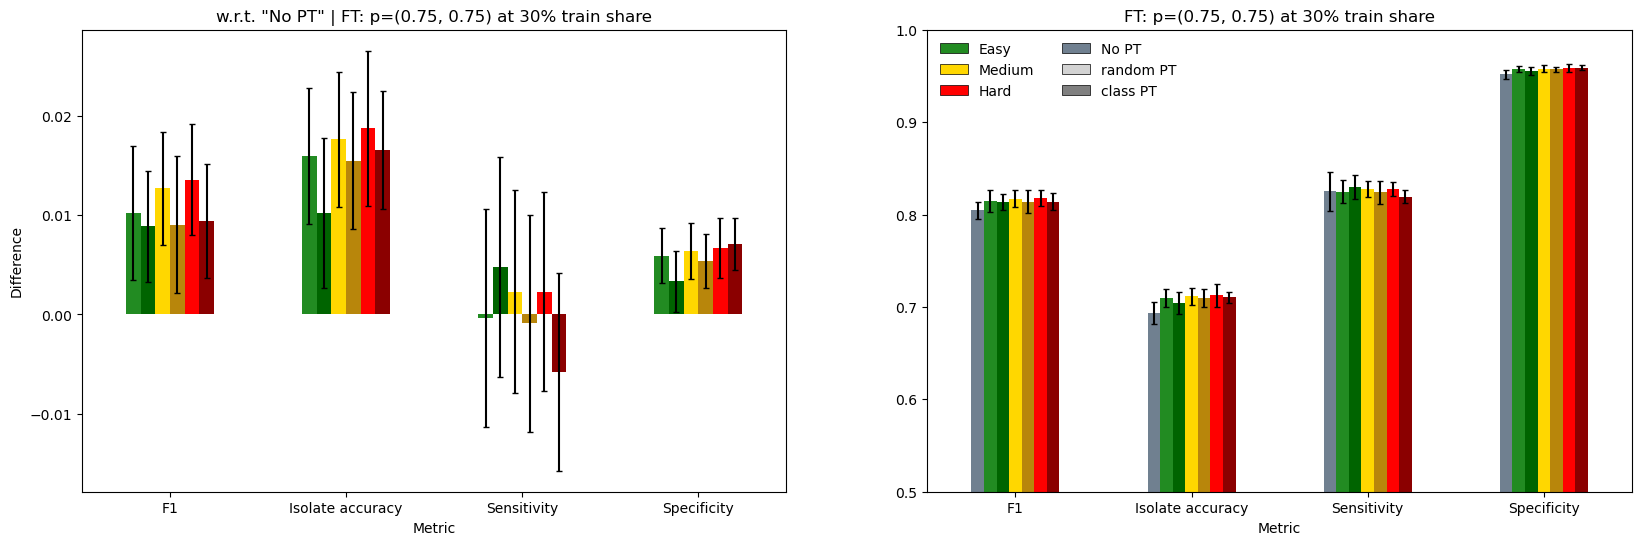

In [22]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.75', '0.3', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.75) at 30% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.75) at 30% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.3.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

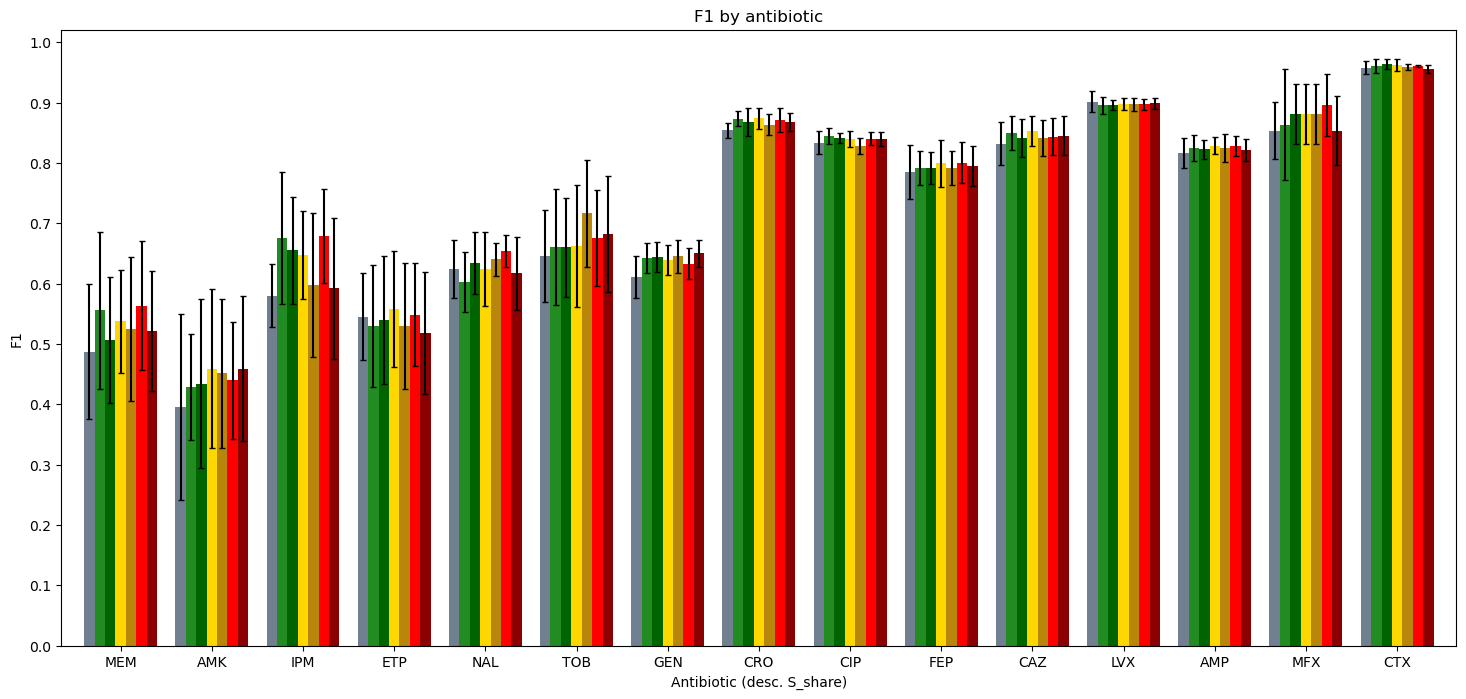

In [23]:
df_CV_ab = load_and_create_ab_df('0.75_0.75', train_share='0.3', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

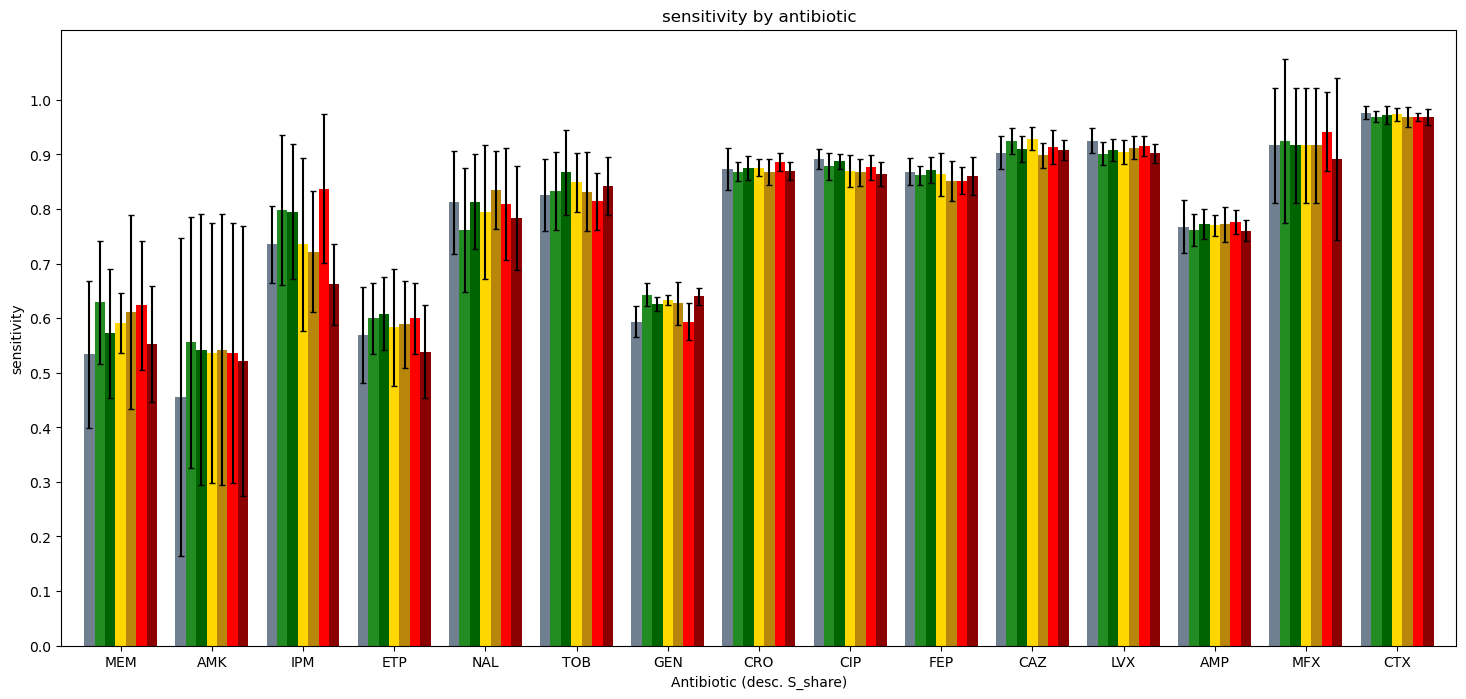

In [24]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)